In [1]:
!ls

bank.csv  sample_data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df['y'].value_counts()

,count
y,
no,4000
yes,521


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [6]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8806629834254144

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.93       807
        True       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905



In [11]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9060773480662984

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

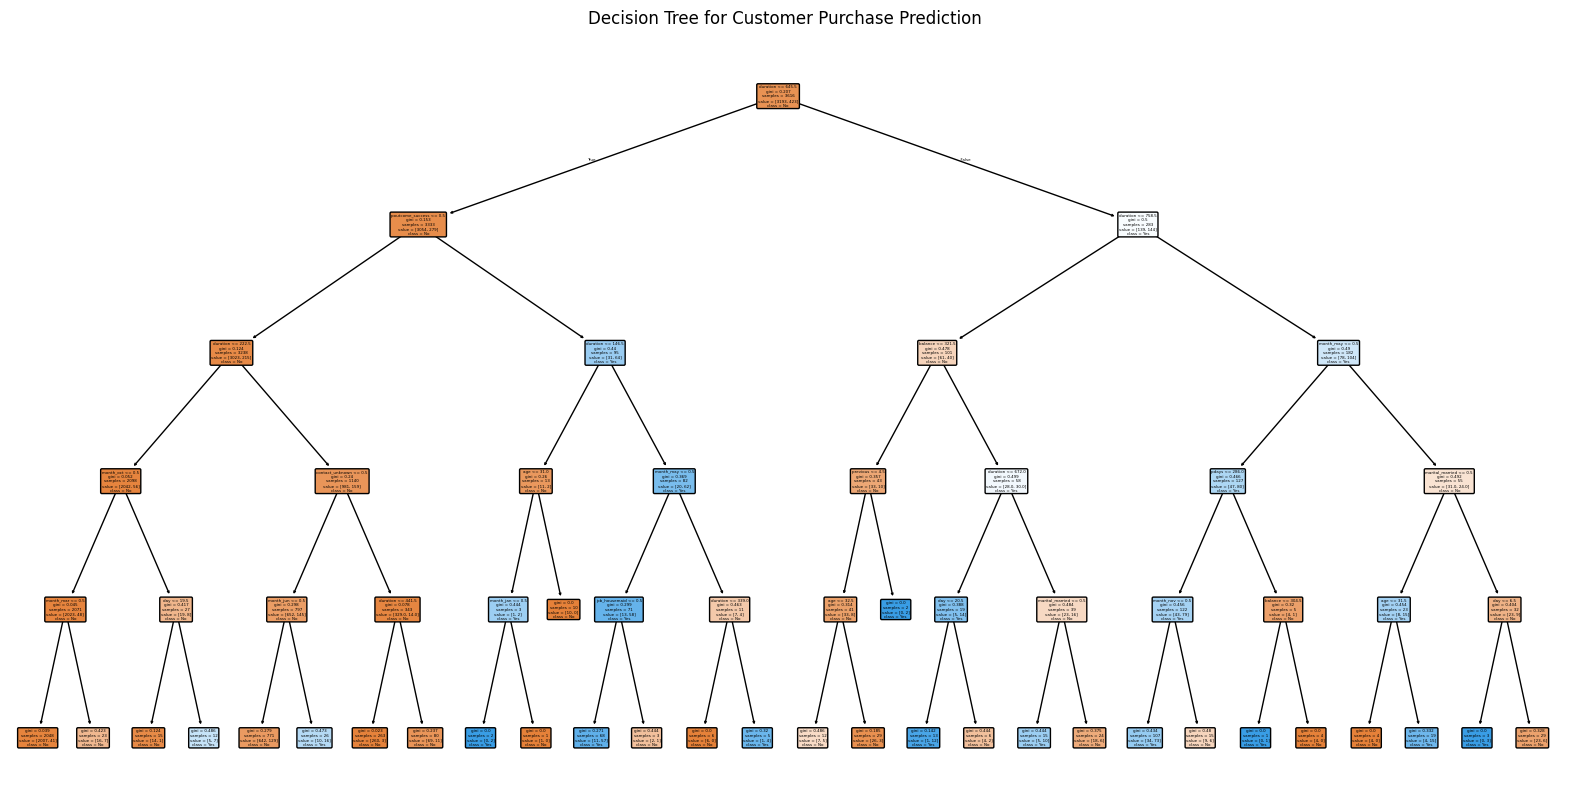

In [13]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Customer Purchase Prediction")
plt.show()